In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import PIL
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [2]:
img_height,img_width = (224,224)
batch_size = 32
train_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_couleur\\test_resnet\\output_couleur\\train"
valid_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_couleur\\test_resnet\\output_couleur\\val"
test_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_couleur\\test_resnet\\output_couleur\\test"

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

valid_generator=train_datagen.flow_from_directory(
    valid_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')#set as validation data

Found 1726 images belonging to 10 classes.
Found 59 images belonging to 10 classes.


In [4]:
test_generator=train_datagen.flow_from_directory(
    test_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation')#set as validation data

Found 64 images belonging to 10 classes.


In [5]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [6]:
base_model = ResNet50(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))

for layer in base_model.layers:
    layer.trainable=False
    
    
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
x = Dense(256,activation='relu')(x)

x = Dense(64,activation='relu')(x)
                     
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs=base_model.input ,outputs=predictions)


In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [8]:
    
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])
model.fit(train_generator,
                         epochs = 100)

Epoch 1/100
54/54 [==============================] - 115s 2s/step - loss: 1.2412 - accuracy: 0.6136
Epoch 2/100
54/54 [==============================] - 88s 2s/step - loss: 0.7698 - accuracy: 0.7665
Epoch 3/100
54/54 [==============================] - 88s 2s/step - loss: 0.6328 - accuracy: 0.8042
Epoch 4/100
54/54 [==============================] - 86s 2s/step - loss: 0.5767 - accuracy: 0.8169
Epoch 5/100
54/54 [==============================] - 88s 2s/step - loss: 0.5194 - accuracy: 0.8337
Epoch 6/100
54/54 [==============================] - 85s 2s/step - loss: 0.4553 - accuracy: 0.8586
Epoch 7/100
54/54 [==============================] - 88s 2s/step - loss: 0.3921 - accuracy: 0.8795
Epoch 8/100
54/54 [==============================] - 86s 2s/step - loss: 0.3778 - accuracy: 0.8772
Epoch 9/100
54/54 [==============================] - 89s 2s/step - loss: 0.3608 - accuracy: 0.8876
Epoch 10/100
54/54 [==============================] - 86s 2s/step - loss: 0.3126 - accuracy: 0.9009
Epoch 11

54/54 [==============================] - 60s 1s/step - loss: 0.0244 - accuracy: 0.9936
Epoch 84/100
54/54 [==============================] - 60s 1s/step - loss: 0.0237 - accuracy: 0.9919
Epoch 85/100
54/54 [==============================] - 60s 1s/step - loss: 0.0582 - accuracy: 0.9849
Epoch 86/100
54/54 [==============================] - 59s 1s/step - loss: 0.0539 - accuracy: 0.9867
Epoch 87/100
54/54 [==============================] - 60s 1s/step - loss: 0.0738 - accuracy: 0.9797
Epoch 88/100
54/54 [==============================] - 59s 1s/step - loss: 0.0387 - accuracy: 0.9884
Epoch 89/100
54/54 [==============================] - 59s 1s/step - loss: 0.0715 - accuracy: 0.9751
Epoch 90/100
54/54 [==============================] - 59s 1s/step - loss: 0.0658 - accuracy: 0.9838
Epoch 91/100
54/54 [==============================] - 60s 1s/step - loss: 0.0494 - accuracy: 0.9896
Epoch 92/100
54/54 [==============================] - 59s 1s/step - loss: 0.0184 - accuracy: 0.9936
Epoch 93/100


In [9]:
model.save('C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_couleur\\save_test\\ResNet50_couleur.h5' )

In [10]:
model = tf.keras.models.load_model("C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_couleur\\save_test\\ResNet50_couleur.h5")


In [11]:
test_loss,test_acc = model.evaluate(train_generator, verbose=2)
print('\ntest accuracy:' , test_acc)

54/54 - 60s - loss: 0.0349 - accuracy: 0.9890 - 60s/epoch - 1s/step

test accuracy: 0.988991916179657


1/1 [==============================] - 0s 30ms/step


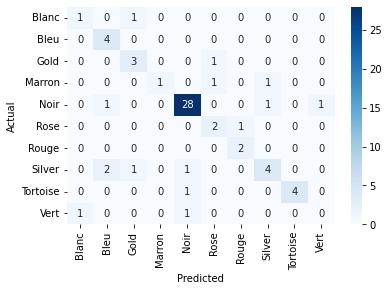

test accuracy:76.5625


In [12]:
model = tf.keras.models.load_model("C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_couleur\\save_test\\ResNet50_couleur.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sns.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()
print('test accuracy:{}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))